# GENSIM for word embeddings 

- THE GENSIM LIBRARY

    - Gensim is an open-source python library for natural language processing.

    - It was developed and is maintained by the Czech natural language processing researcher Radim Řehůřek. 

    - In the previous tutorial, we have seen how you can use this package to do topic modeling.
    
    - Here we use `gensim` for word embedding. 
    

- Word embeddings can be used for:
    - automated text tagging
    - recommendation engines
    - synonyms and search query expansion
    - machine translation
    - plain feature engineering

One example

<img src="1.png" alt="drawing" width="600"/>

Another example

<img src="2.png" alt="drawing" width="400"/>

## Software for word embeddings 

- Software for training and using word embeddings includes 
    - Tomas Mikolov's Word2vec, 
    - Stanford University's GloVe, GN-GloVe 
    - AllenNLP's ELMo,
    - BERT
    - fastText 
    - Gensim
    - Indra and Deeplearning4j
  
    - Principal Component Analysis (PCA) and T-Distributed Stochastic Neighbour Embedding (t-SNE) are both used to reduce the dimensionality of word vector spaces and visualize word embeddings and clusters.

In [7]:
import pandas as pd
import numpy as np

import re  # For preprocessing

# from collections import defaultdict
# from time import time  # To time our operations
# import warnings
# warnings.filterwarnings('ignore')
# import logging  # Setting up the loggings to monitor gensim
# logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

## 1) CREATE A WORD2VEC MODEL

- Training the model: Gensim Word2Vec Implementation:
    - We use Gensim implementation of word2vec: https://radimrehurek.com/gensim/models/word2vec.html

In [8]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile

common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

## train a simpliest word embedding by yourself

In [9]:
model_1 = Word2Vec(common_texts, vector_size=100, window=5, min_count=1, workers=4)

The hyperparameters of `Word2Vec`:

- `vector_size`: # of dimensions of the embeddings and the default is 100.
- `window`: The maximum distance between a target word and words around the target word. The default window is 5.
- `min_count`: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
- `workers`: # of worker threads used to train the model; depends on your computer.
- `sg`: The training algorithm, either CBOW(0) or skip-gram (1). The default training algorithm is CBOW.

In [10]:
vector = model_1.wv['computer']  # 'wv': word to vector
vector

array([-0.00515774, -0.00667028, -0.0077791 ,  0.00831315, -0.00198292,
       -0.00685696, -0.0041556 ,  0.00514562, -0.00286997, -0.00375075,
        0.0016219 , -0.0027771 , -0.00158482,  0.0010748 , -0.00297881,
        0.00852176,  0.00391207, -0.00996176,  0.00626142, -0.00675622,
        0.00076966,  0.00440552, -0.00510486, -0.00211128,  0.00809783,
       -0.00424503, -0.00763848,  0.00926061, -0.00215612, -0.00472081,
        0.00857329,  0.00428459,  0.0043261 ,  0.00928722, -0.00845554,
        0.00525685,  0.00203994,  0.0041895 ,  0.00169839,  0.00446543,
        0.0044876 ,  0.0061063 , -0.00320303, -0.00457706, -0.00042664,
        0.00253447, -0.00326412,  0.00605948,  0.00415534,  0.00776685,
        0.00257002,  0.00811905, -0.00138761,  0.00808028,  0.0037181 ,
       -0.00804967, -0.00393476, -0.0024726 ,  0.00489447, -0.00087241,
       -0.00283173,  0.00783599,  0.00932561, -0.0016154 , -0.00516075,
       -0.00470313, -0.00484746, -0.00960562,  0.00137242, -0.00

In [11]:
len(vector)

100

In [12]:
# new words? cannot handle
model_1.wv['hi']

KeyError: "Key 'hi' not present"

In [13]:
model_1.wv.most_similar('graph')

[('user', 0.06793873757123947),
 ('survey', 0.033640600740909576),
 ('eps', 0.0093911811709404),
 ('human', 0.008315952494740486),
 ('minors', 0.004503021948039532),
 ('system', -0.010839170776307583),
 ('trees', -0.023671651259064674),
 ('computer', -0.09575343132019043),
 ('time', -0.11410721391439438),
 ('response', -0.11557212471961975)]

In [14]:
## save model
model_1.save("word2vec.model")

## 2) WORD EMBEDDING Using a Real Dataset

In this example, I use [a dataset from Kaggle](https://www.kaggle.com/CooperUnion/cardataset). This cars dataset includes features such as make, model, year, engine, and other properties of the car. We will use these features to generate the word embeddings for each make model and then compare the similarities between different make model. The following dataframe shows the detail information of this dataset.

Note what we are doing: **the structure of word embedding can not only be used on text but also on observation-feature dataframes**! Fundamentally it's about dimension reduction. 

In fact this is [also true for topic modeling (LDA)](https://www.journals.uchicago.edu/doi/10.1086/705331)

In [15]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### PRE-PROCESS WORDS

- Cleaning 
    - Removing the missing values;
    - Lemmatizing;
    - Removing the stopwords;
    - Removes non-alphabetic characters: regular expression;
    - Bigrams: We can use Gensim Phrases package to automatically detect common phrases (bigrams) from a list of sentences. https://radimrehurek.com/gensim/models/phrases.html

         ```python
         from gensim.models.phrases import Phrases, Phraser
         ```
         - As Phrases() takes a list of list of words as input:
        ```python
        sent = [row.split() for row in df_clean['clean']]
        ```


Since the purpose of this tutorial is to learn how to generate word embeddings using genism library, I will not do the EDA and feature selection for the word2vec model for the sake of simplicity. 
<br> 
Genism word2Vec requires that a format of list of list for training where every document is contained in a list and every list contains list of tokens of that document. At first, we need to generate a format of list of list for training the make model word embedding. To be more specific, each make model is contained in a list and every list contains list of features of that make model.

To achieve these, we need to do the following data preprocessing steps:

1. Create a new column for Make Model 
2. Generate a format of list of list for each Make Model with the following features: Engine Fuel Type, Transmission Type, Driven_Wheels, Market Category, Vehicle Size and Vehicle Style. 


1. Create a new column for Make Model

In [16]:
df['Maker_Model']= df['Make']+ " " + df['Model']

2. Generate a format of list of list for each Make Model 

In [17]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Maker_Model
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,BMW 1 Series M
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,BMW 1 Series
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,BMW 1 Series
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,BMW 1 Series
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,BMW 1 Series


In [18]:
# Select features from original dataset to form a new dataframe 
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category',
          'Vehicle Size', 'Vehicle Style', 'Maker_Model']]
df1

,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,Maker_Model
0,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,BMW 1 Series M
1,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,BMW 1 Series
2,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,BMW 1 Series
3,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,BMW 1 Series
4,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible,BMW 1 Series
...,...,...,...,...,...,...,...
11909,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,Acura ZDX
11910,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,Acura ZDX
11911,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,Acura ZDX
11912,premium unleaded (recommended),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,Acura ZDX


In [19]:
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1) 
df2

0        premium unleaded (required),MANUAL,rear wheel ...
1        premium unleaded (required),MANUAL,rear wheel ...
2        premium unleaded (required),MANUAL,rear wheel ...
3        premium unleaded (required),MANUAL,rear wheel ...
4        premium unleaded (required),MANUAL,rear wheel ...
                               ...                        
11909    premium unleaded (required),AUTOMATIC,all whee...
11910    premium unleaded (required),AUTOMATIC,all whee...
11911    premium unleaded (required),AUTOMATIC,all whee...
11912    premium unleaded (recommended),AUTOMATIC,all w...
11913    regular unleaded,AUTOMATIC,front wheel drive,L...
Length: 11914, dtype: object

In [20]:
# Store them in the pandas dataframe
df_clean = pd.DataFrame({'clean': df2}) 

df_clean

,clean
0,"premium unleaded (required),MANUAL,rear wheel ..."
1,"premium unleaded (required),MANUAL,rear wheel ..."
2,"premium unleaded (required),MANUAL,rear wheel ..."
3,"premium unleaded (required),MANUAL,rear wheel ..."
4,"premium unleaded (required),MANUAL,rear wheel ..."
...,...
11909,"premium unleaded (required),AUTOMATIC,all whee..."
11910,"premium unleaded (required),AUTOMATIC,all whee..."
11911,"premium unleaded (required),AUTOMATIC,all whee..."
11912,"premium unleaded (recommended),AUTOMATIC,all w..."


In [21]:
df_clean['clean'][0]

'premium unleaded (required),MANUAL,rear wheel drive,Factory Tuner,Luxury,High-Performance,Compact,Coupe,BMW 1 Series M'

In [22]:
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]
# show the example of list of list format of the custom corpus for gensim modeling 
sent[:2] 

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

In [23]:
len(sent)

11914

### Genism word2vec Model Training 

In [24]:
## Train the genisim word2vec model with our own custom corpus
model_2 = Word2Vec(sent, min_count=1, vector_size= 50, workers=3, window =3, sg = 1)

In [25]:
## We can obtain the word embedding directly from the training model
model_2.wv['BMW 1 Series']

array([-0.07717654, -0.02643459,  0.0199979 ,  0.02855057, -0.0854785 ,
       -0.26071587, -0.14208136,  0.28646317,  0.00552344, -0.16883259,
        0.20747536,  0.06550636, -0.08104827, -0.03091119,  0.06177012,
        0.19025967,  0.17927425,  0.10032885, -0.01486059, -0.32199928,
       -0.04784615, -0.0097861 ,  0.27296683, -0.02010188,  0.23374657,
       -0.00518602, -0.20565544,  0.3848557 ,  0.06145772, -0.20398317,
       -0.13880561,  0.11313042, -0.06206331,  0.17737249,  0.01881498,
       -0.09174283,  0.1530068 ,  0.02876766,  0.13364555,  0.18137018,
        0.07175879,  0.08970671, -0.27052668,  0.03363407,  0.24964872,
        0.03350701, -0.09936708,  0.00097246,  0.04426568,  0.1787854 ],
      dtype=float32)

### Compare Similarities 

Now we could even use Word2vec to compute similarity between two make model in the vocabulary by invoking the model.similarity() and passing in the relvevant words. For instance,  model.similarity('Porsche 718 Cayman', 'Nissan Van') This will give us the Euclidian similarity between Porsche 718 Cayman and Nissan Van. 

In [26]:
model_2.wv.similarity('Porsche 718 Cayman', 'Nissan Van')

0.8304435

In [27]:
model_2.wv.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')

0.91346014

From the above example, we can tell that Porsche 718 Cayman is more similar with Mercedes-Benz SLK-Class than Nissan Van. We also can use the build in function model.most_similar() to get a set of the most similar make models for a given make model.

In [28]:
## Show the most similar vehicles for Mercedes-Benz SLK-Class : Default by eculidean distance 
model_2.wv.most_similar('Mercedes-Benz SLK-Class')[:5]

[('Audi S3', 0.9917572736740112),
 ('Lamborghini Huracan', 0.9901747107505798),
 ('Nissan GT-R', 0.989833652973175),
 ('Audi RS 5', 0.9889529943466187),
 ('Ford Shelby GT500', 0.988299548625946)]

In [29]:
## Show the most similar vehicles for Toyota Camry : Default by eculidean distance 
model_2.wv.most_similar('Toyota Camry')[:5]

[('Kia Optima', 0.9839407801628113),
 ('Oldsmobile Alero', 0.9838610291481018),
 ('Ford Five Hundred', 0.9834837317466736),
 ('Oldsmobile Cutlass Ciera', 0.9826797842979431),
 ('Oldsmobile Intrigue', 0.9824801683425903)]

However, Euclidian similarity cannot work well for the high-dimensional word vectors, This is because Euclidian similarity will increase as the number of dimensions increases even if the word embedding stands for different meanings. Alternatively, we can use cosine similarity to measure the similarity between two vectors.  

For Vector $A$ and $B$, the dot product is given by $ A \cdot B = \|A\| \|B\| \cos(\theta)$

The cosine similarity is given by $ \cos(\theta) = \frac{A \cdot B}{\|A\| \|B\|} $

Cosine similarity measures the cosine of the angle between two vectors projected in a multi-dimensional space. Therefore, the cosine similarity captures the angle of the word vectors and not the magnitude. Under cosine similarity, no similarity is expressed as a 90-degree angle while the total similarity of 1 is at 0 degree 
angle. The following function shows how can we generate the most similar make model based on cosine similarity.

In [30]:
from numpy import dot
from numpy.linalg import norm

def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model.wv[word]
    
    for item in target_list :
        if item != word :
            b = model.wv[item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    
    return word_list[0:num]

In [31]:
Maker_Model = list(df.Maker_Model.unique()) ## only get the unique Maker_Model_Year

## Show the most similar Mercedes-Benz SLK-Class by cosine distance 
cosine_distance(model_2,'Mercedes-Benz SLK-Class',Maker_Model,5) 

[('Audi S3', 0.9917574),
 ('Lamborghini Huracan', 0.99017465),
 ('Nissan GT-R', 0.98983365),
 ('Audi RS 5', 0.988953),
 ('Ford Shelby GT500', 0.9882995)]

In [32]:
model_2.wv.most_similar('Mercedes-Benz SLK-Class')[:5]

[('Audi S3', 0.9917572736740112),
 ('Lamborghini Huracan', 0.9901747107505798),
 ('Nissan GT-R', 0.989833652973175),
 ('Audi RS 5', 0.9889529943466187),
 ('Ford Shelby GT500', 0.988299548625946)]

### T-SNE Plot

It’s hard to visualize the word embedding directly, for they usually has more than 3 dimensions. T-SNE is an useful tool to visualize high-dimensional data by reducing dimensional space while keeping relative pairwise distance between points. It can be said that t-SNE looking for a new data representation where the neighborhood relations are preserved. In this tutorial, I used TSNE package from scikit-learn library. The following code showed how to plot the word embedding with T-SNE plot. 

In [85]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.wv.most_similar(word)

    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, perplexity = 10, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+1, x_coords.max()+1)
    plt.ylim(y_coords.min()+1, y_coords.max()+1)
    plt.show()

<IPython.core.display.Javascript object>


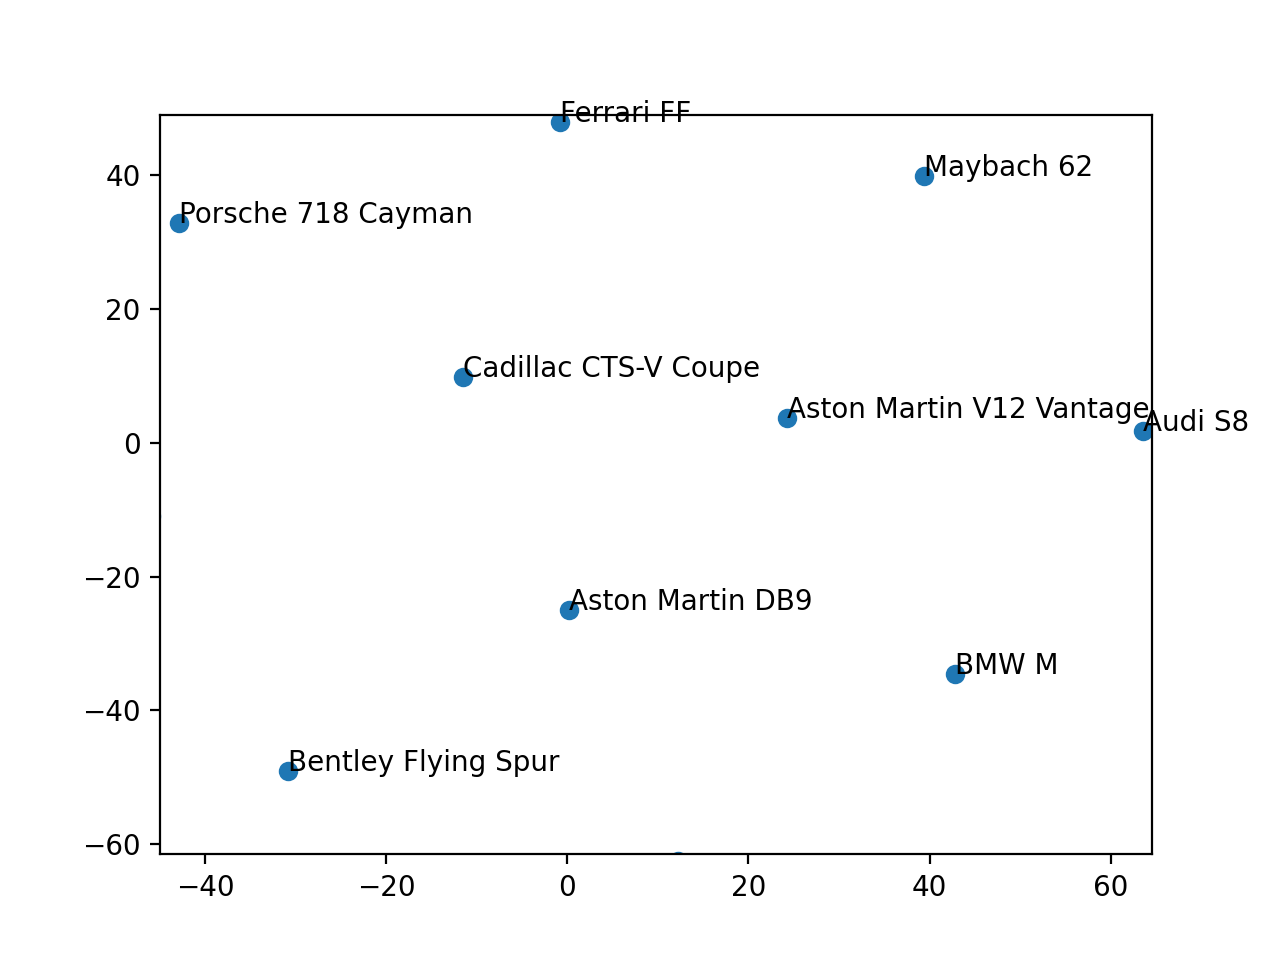

In [86]:
display_closestwords_tsnescatterplot(model_2, 'Porsche 718 Cayman', 50)

In [74]:
model_2.wv.most_similar('Porsche 718 Cayman')[:5]

[('Bentley Flying Spur', 0.9342861175537109),
 ('Ferrari FF', 0.9323840141296387),
 ('Cadillac CTS-V Coupe', 0.9298292994499207),
 ('Maybach 62', 0.9272620677947998),
 ('BMW M', 0.9272598624229431)]

In [43]:
close_words = model_2.wv.most_similar('Porsche 718 Cayman')
close_words

[('Bentley Flying Spur', 0.9342861175537109),
 ('Ferrari FF', 0.9323840141296387),
 ('Cadillac CTS-V Coupe', 0.9298292994499207),
 ('Maybach 62', 0.9272620677947998),
 ('BMW M', 0.9272598624229431),
 ('Lexus RC F', 0.9264143109321594),
 ('McLaren MP4-12C', 0.9261119961738586),
 ('Aston Martin V12 Vantage', 0.9261040687561035),
 ('Aston Martin DB9', 0.9259312748908997),
 ('Audi S8', 0.925678014755249)]

In [41]:
arr = np.empty((0,50), dtype='f')
arr = np.append(arr, np.array([model_2.wv['Porsche 718 Cayman']]), axis=0)
print(arr)

[[ 0.01060017 -0.00150124  0.0199236   0.01251407 -0.03408172 -0.06526218
  -0.01456741  0.05177468  0.01479507 -0.05412593  0.0451182   0.02207622
  -0.01590848  0.0027943  -0.0127048   0.02268448  0.05116872  0.02197038
  -0.0221251  -0.07535294 -0.00965783  0.01310585  0.07188041  0.02134207
   0.03219219 -0.00101714 -0.03723896  0.08177488 -0.01561784 -0.03627349
  -0.04867433  0.01988006 -0.0134102  -0.00150729  0.01685519  0.00225457
   0.03520798 -0.01059565  0.01654675  0.01469656  0.02491462  0.00711984
  -0.05644917  0.0166321   0.08889492  0.01787498 -0.01036914  0.00362322
   0.01973347  0.0202044 ]]


In [44]:
wrd_vector = model_2.wv[close_words[0][0]]
arr = np.append(arr, np.array([wrd_vector]), axis=0)
print(arr)

[[ 0.01060017 -0.00150124  0.0199236   0.01251407 -0.03408172 -0.06526218
  -0.01456741  0.05177468  0.01479507 -0.05412593  0.0451182   0.02207622
  -0.01590848  0.0027943  -0.0127048   0.02268448  0.05116872  0.02197038
  -0.0221251  -0.07535294 -0.00965783  0.01310585  0.07188041  0.02134207
   0.03219219 -0.00101714 -0.03723896  0.08177488 -0.01561784 -0.03627349
  -0.04867433  0.01988006 -0.0134102  -0.00150729  0.01685519  0.00225457
   0.03520798 -0.01059565  0.01654675  0.01469656  0.02491462  0.00711984
  -0.05644917  0.0166321   0.08889492  0.01787498 -0.01036914  0.00362322
   0.01973347  0.0202044 ]
 [-0.05264445  0.03060784  0.06021997 -0.01035581 -0.0388361  -0.18523082
  -0.05901085  0.23591615 -0.00240823 -0.141939    0.1556298   0.0810214
  -0.02289717 -0.05560675 -0.00728506  0.10461649  0.1292854   0.11271244
  -0.06384484 -0.2848309  -0.03150256 -0.00606363  0.21986279  0.02902799
   0.13211639 -0.02357716 -0.12490875  0.23516926 -0.00070762 -0.11796266
  -0.0717047

# 3) Read pre-trained models

As we said, it's usually far better to use some pre-trained embeddings instead of starting from scratches

Read more: https://radimrehurek.com/gensim/models/keyedvectors.html


I will read GloVe's pre-trained vectors here. Gensim offers download of some other pre-trained vectors. See
https://github.com/RaRe-Technologies/gensim-data


And a more complete pre-trained vector dataset can be found here
http://vectors.nlpl.eu/repository/

You may need to manually download them to your disk and let Gensim read in.


Another source for Pre-trainned word and phrase vectors from Google: https://code.google.com/archive/p/word2vec/

In [ ]:
import gensim.downloader as api

word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data


Then we can find similar words

In [ ]:
result = word_vectors.most_similar(positive=['woman'])
result

As you may observe, girl and man are really different things. So we can use the king/queen and man/women analogy to find what's the similar word to "woman", if we hope to find pairs such as (king, queen)

$ man = woman + king - queen $

In [ ]:
result = word_vectors.most_similar(positive=['king', 'woman'], negative=['queen'])
result

$ queen = king + woman - man $

In [ ]:
result = word_vectors.most_similar(positive=[ 'king', 'woman'], negative=['man'])
result

### Using GoogleNews-vectors-negative300.bin.gz  as an example

The GoogleNews-vectors-negative300.bin.gz is pretty large and I won't upload it to GitHub. Please download it from [the official source](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g) to your local computer if you want to try out the following code. 

In [ ]:
file = '/Users/percychan/Tech/GoogleNews-vectors-negative300.bin'

In [ ]:
# Load pretrained model (since intermediate data is not included, the model cannot be refined with additional data)

model_google = gensim.models.KeyedVectors.load_word2vec_format(file, binary=True,limit= 100000) 

In [ ]:
dog = model_google['dog']
print(dog.shape)
print(dog)

In [ ]:
# Deal with an out of dictionary word: Михаил (Michail)
if 'Михаил' in model_google:
    print(model_google['Михаил'].shape)
else:
    print('{0} is an out of dictionary word'.format('Михаил'))

In [ ]:
# Some predefined functions that show content related information for given words
model_google.most_similar(positive=['woman', 'king'], negative=['man'])

In [ ]:
vec = model_google['king'] - model_google['man'] + model_google['woman']
model_google.most_similar([vec])

In [ ]:
vec = model_google['Berlin'] - model_google['Germany'] + model_google['China']
model_google.most_similar([vec])

In [ ]:
vec = model_google['Germany'] - model_google['Berlin'] + model_google['Beijing']
model_google.most_similar([vec])

In [ ]:
vec = model_google['Messi'] - model_google['soccer'] + model_google['tennis']
model_google.most_similar([vec])

In [ ]:
model_google.doesnt_match("breakfast economics dinner lunch".split())

In [ ]:
model_google.similarity('woman', 'man')

In [ ]:
model_google.similarity('Harvard', 'Stanford')

In [ ]:
model_google.similarity('Cambridge', 'Oxford')

In [ ]:
model_google.most_similar('Harvard')

In [ ]:
model_google.similarity('HKUST', 'HKU')

In [ ]:
model_google.similarity('Economics', 'Sociology')

In [ ]:
model_google.similarity('Statistics', 'Economics')

In [ ]:
model_google.similarity('Statistics', 'Sociology')

# Software 
- GloVe: https://nlp.stanford.edu/projects/glove/
- Word2Vec: https://code.google.com/archive/p/word2vec/
- Tensorflow Word2Vec tutorial: https://www.tensorflow.org/tutorials/text/word_embeddings